In [188]:
#install library
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [189]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [190]:
#prepare the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [191]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [192]:
#data statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [193]:
#check missing data
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dari keterangan diatas, nilai minimum untuk Glucose, BloodPressure, SkinThickness, Insulin, BMI adalah 0. Namun akan sangat aneh apabila seseorang punya tekanan darah bernilai 0, maka dari itu data ini mengandung missing data dalam bentuk 0, pengecualian untuk Pregnancies.

Data yang bernilai 0 akan diisi dengan nilai mean data columns.

In [194]:
#fill 0 values
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [195]:
#data statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


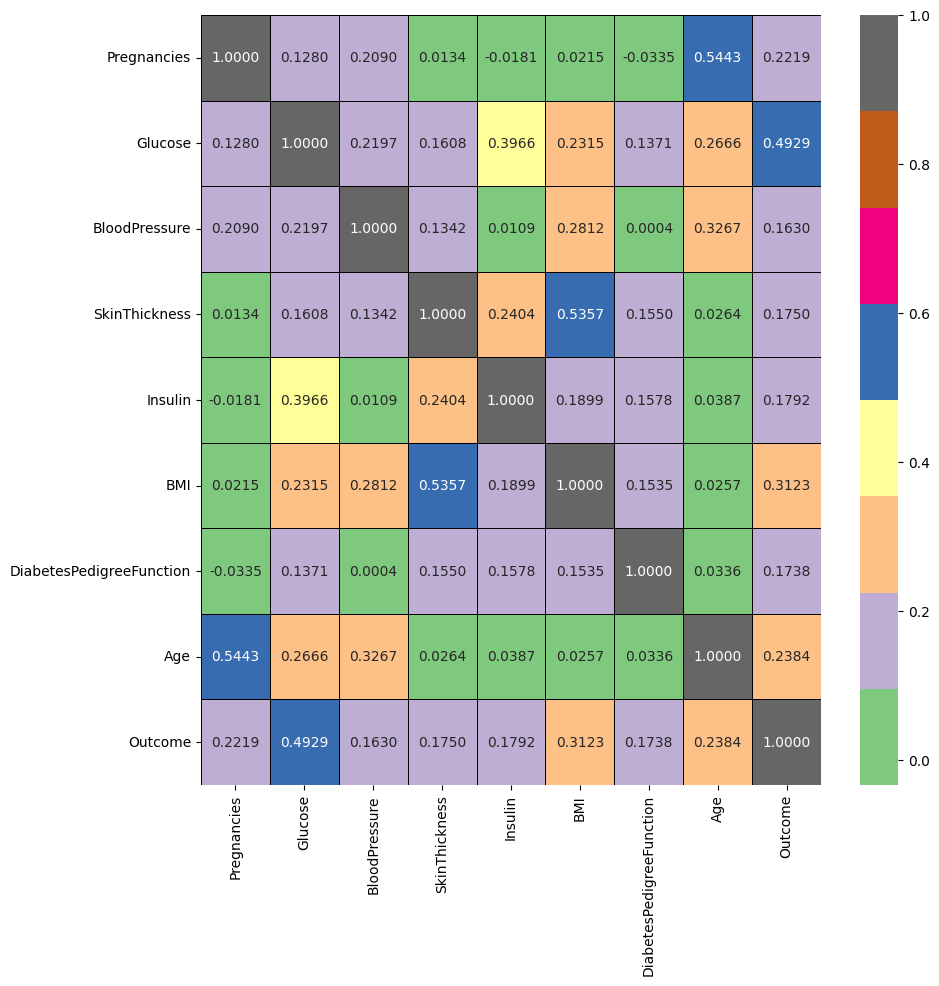

In [196]:
#create the correlation heatmap every parameter
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", cmap="Accent", ax = ax)
plt.show()

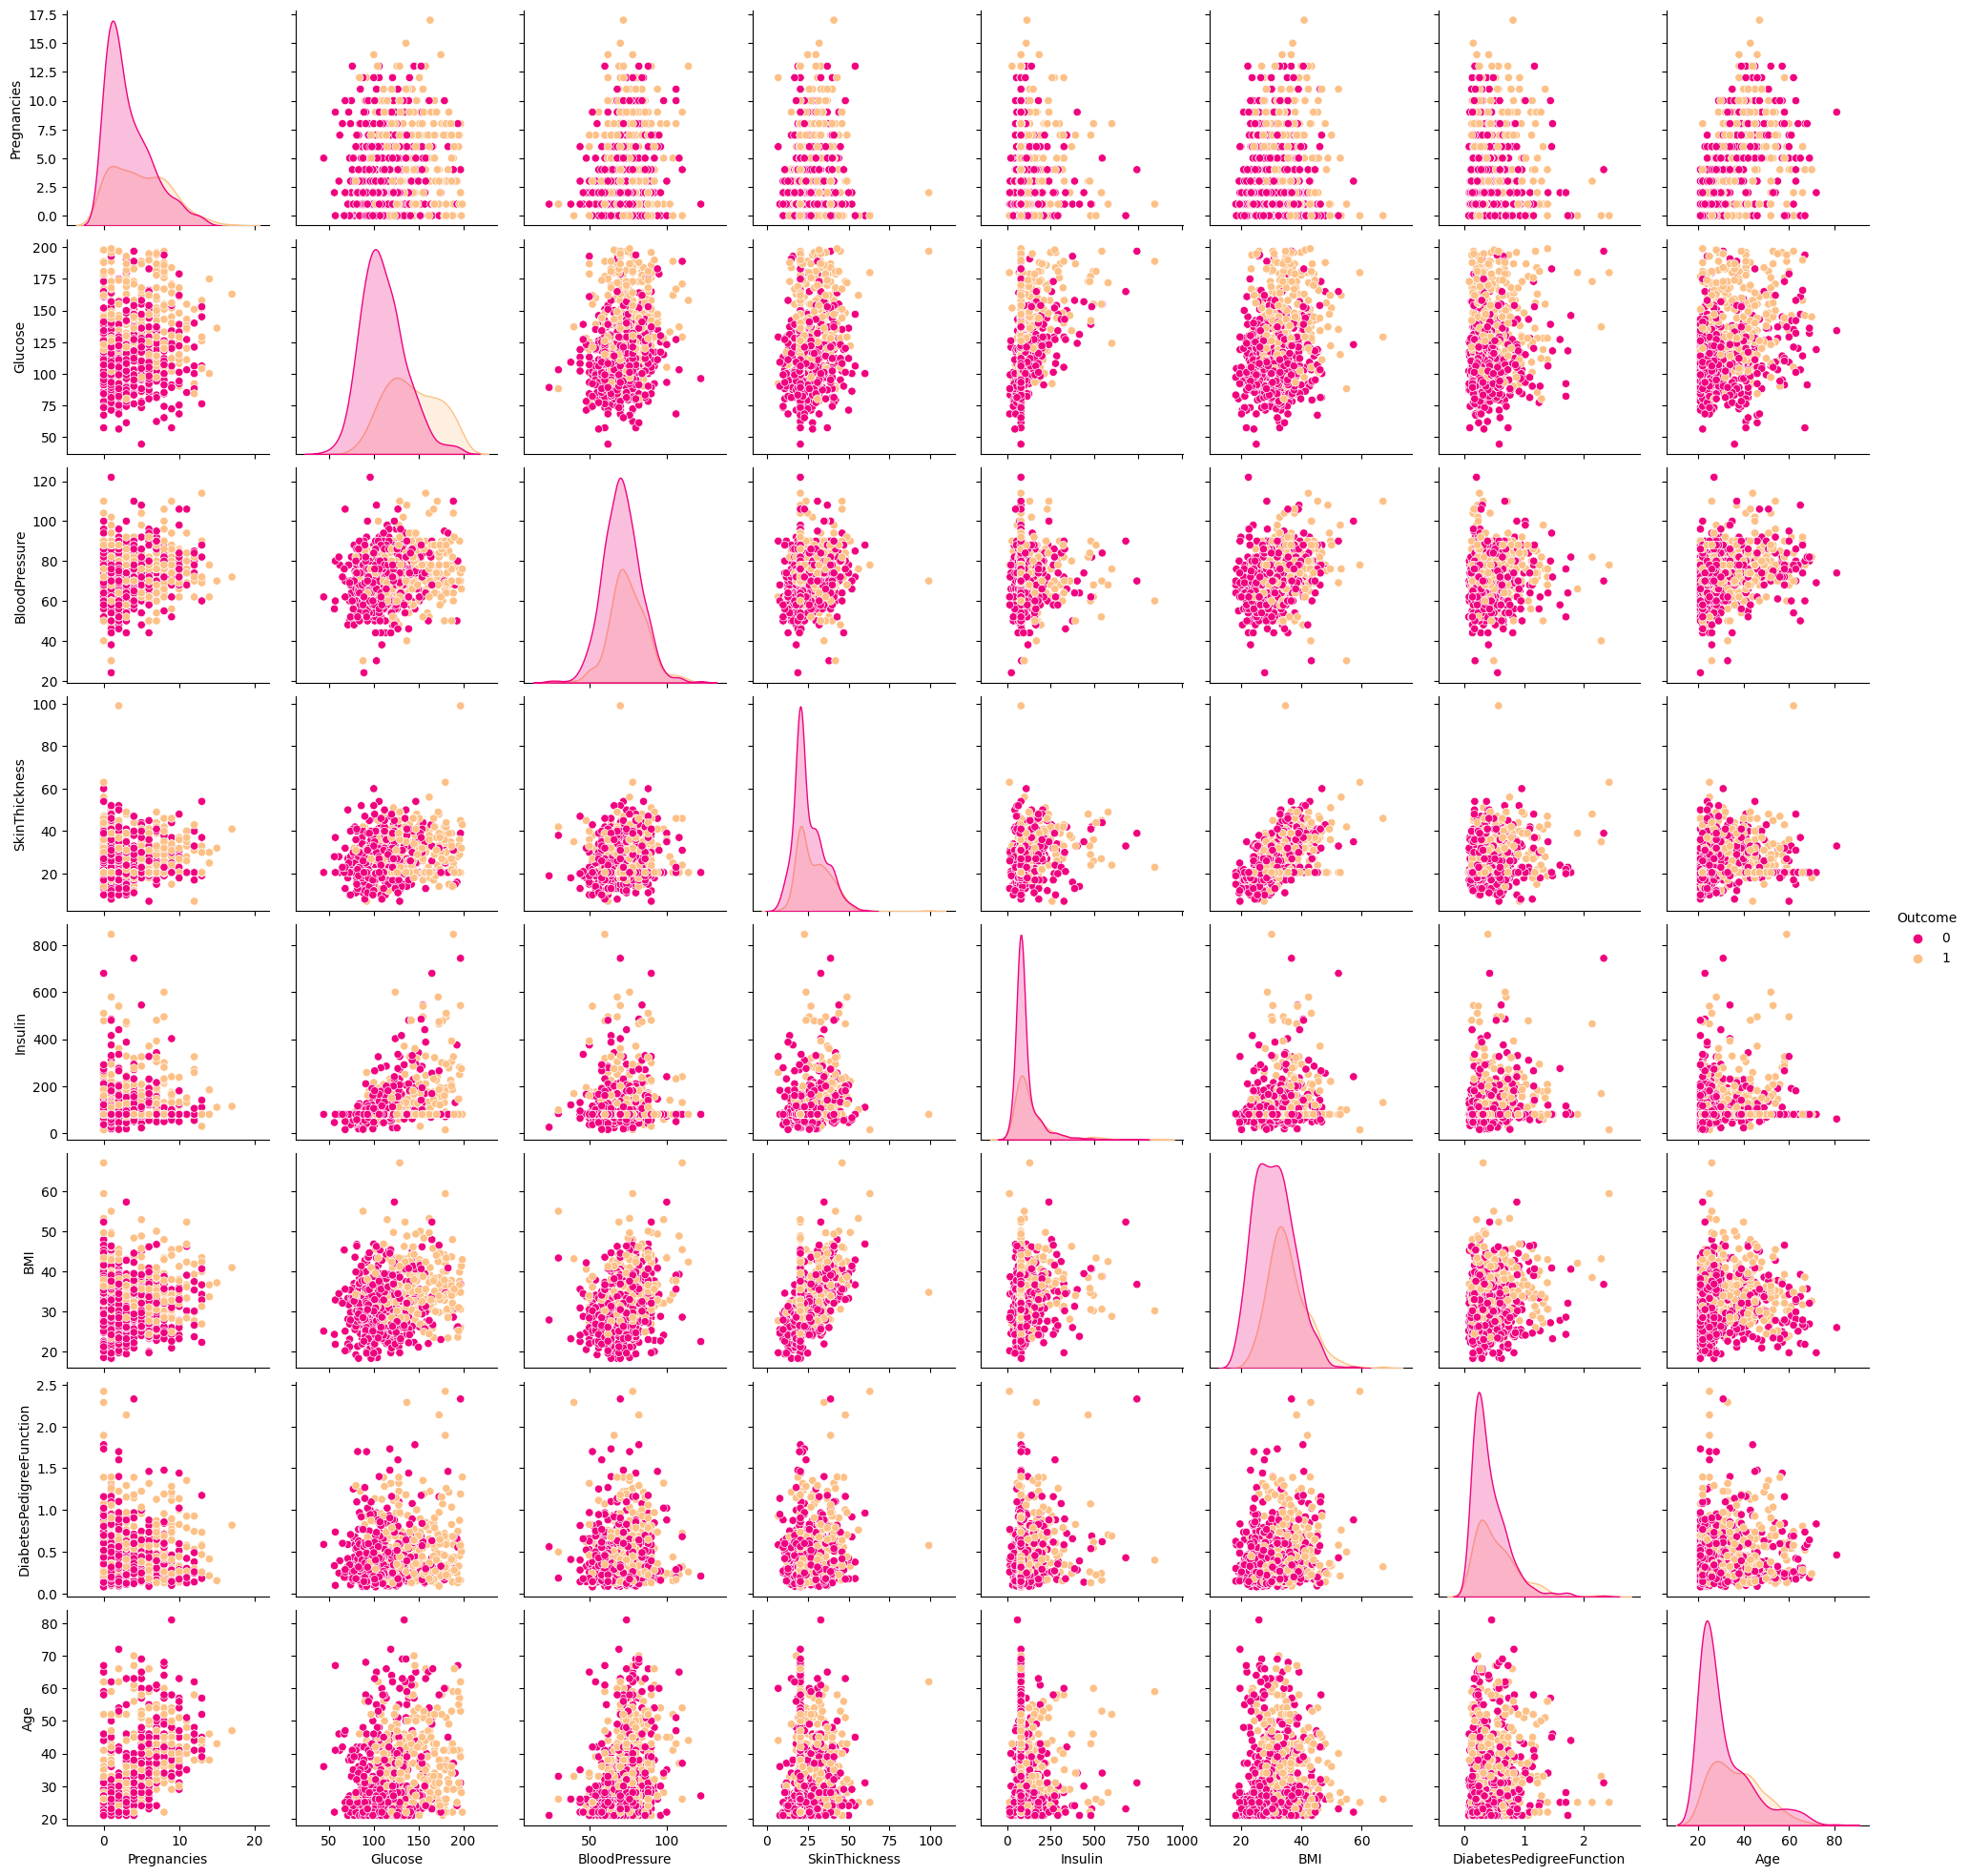

In [197]:
#create the pairplot
sns.pairplot(df, hue='Outcome', palette='Accent_r')

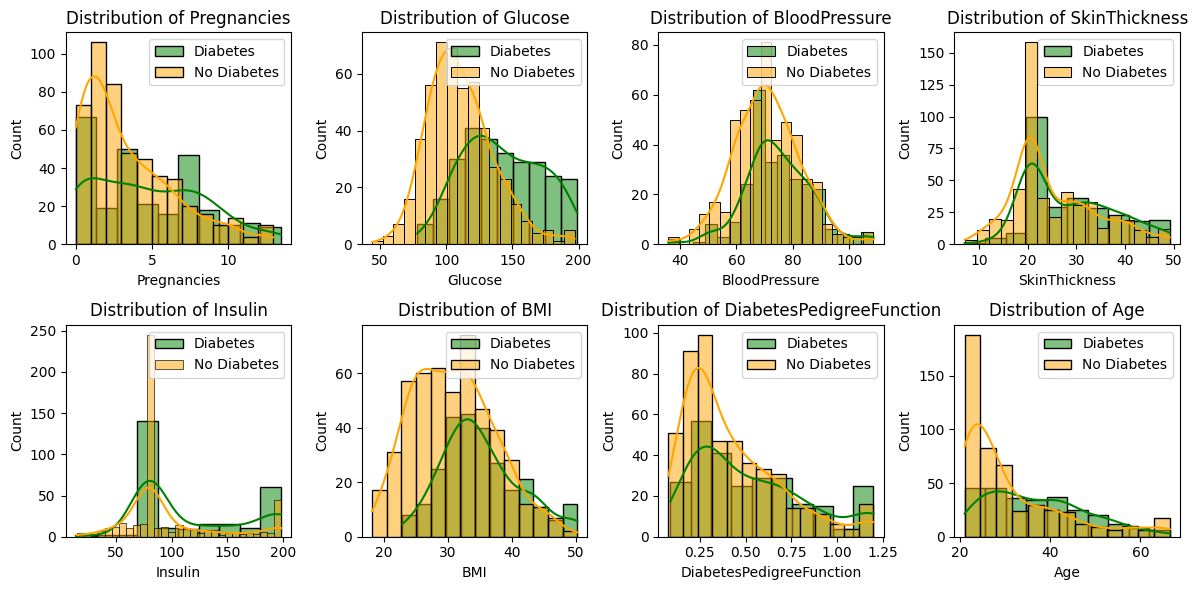

In [410]:
#parameter distribution vis
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[df['Outcome'] == 1][col], kde=True, label='Diabetes', color='green')
    sns.histplot(df[df['Outcome'] == 0][col], kde=True, label='No Diabetes', color='orange')
    plt.title(f"Distribution of {col}")
    plt.legend()
plt.tight_layout()
plt.show()

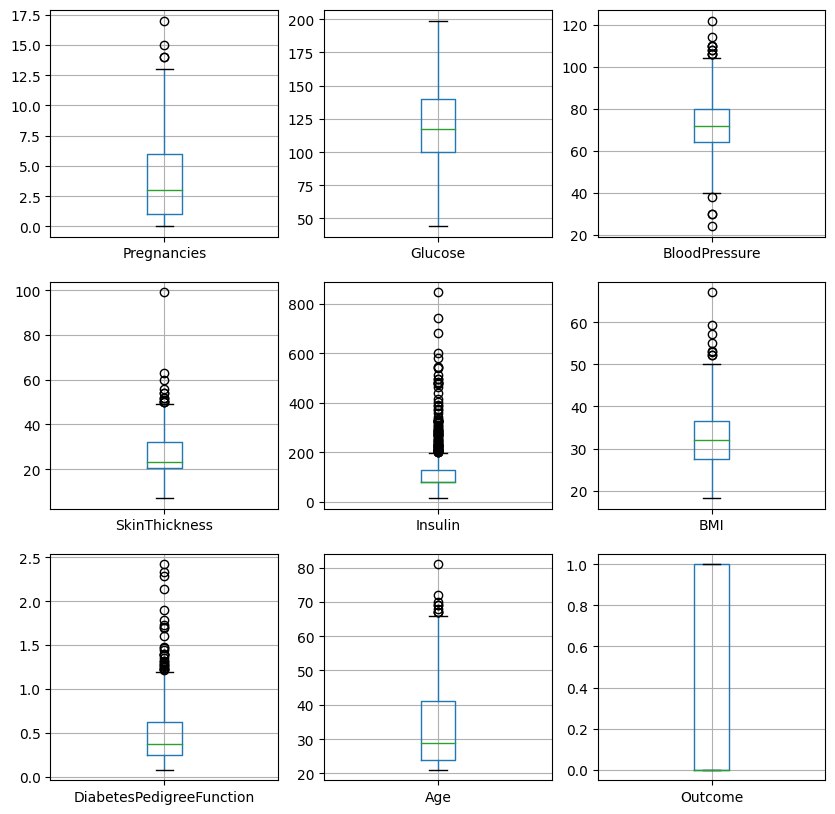

In [198]:
#check data outlier
plt.figure(figsize=(10,10))
i=1
for col in df.columns:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

In [199]:
#removing the outlier
for col in df.iloc[:,:-1]:
    skewness = df[col].skew()
    if -0.5 < skewness < 0.5:
        mean = df[col].mean()
        std_dev = df[col].std()
        upper = mean + 3 * std_dev
        lower = mean - 3 * std_dev
        df[col] = np.clip(df[col], lower, upper)
        
    else:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr
        df[col] = np.clip(df[col], lower, upper)

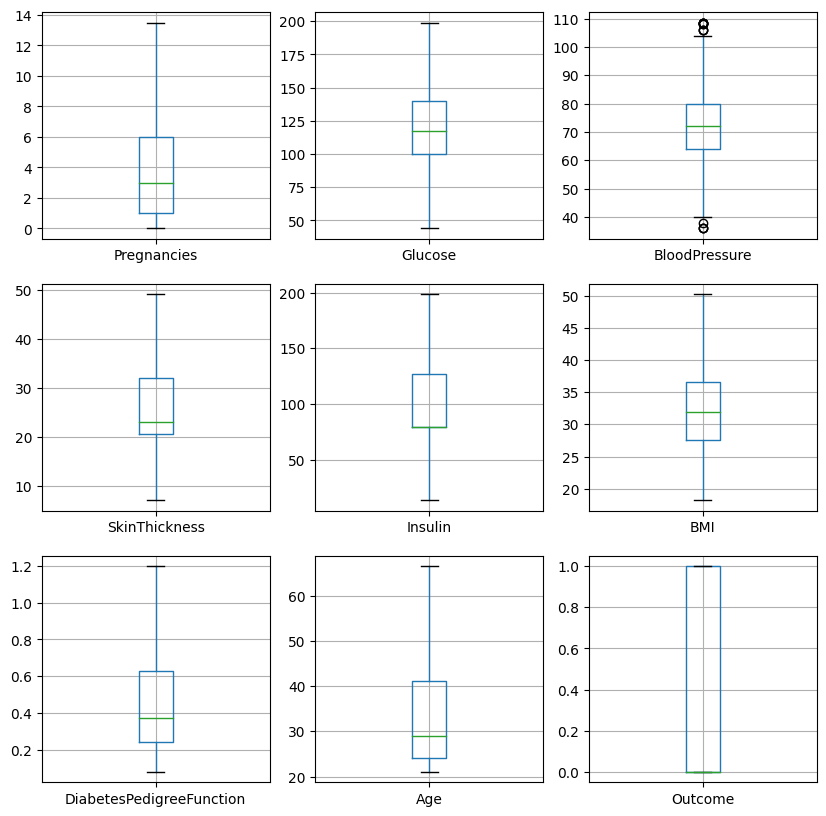

In [200]:
#check data outlier
plt.figure(figsize=(10,10))
i=1
for col in df.columns:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

In [306]:
#Split dataset menjadi 2: data training dan data testing
from sklearn.model_selection import train_test_split
x = df.drop('Outcome',axis=1) #feature
y = df['Outcome'] #target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
method_names = []
test_accuracies_scores = []
train_accuracies_scores = []
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


#### Building the Model

##### 1. Logistic Regression

In [308]:
#Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,auc,accuracy_score,precision_recall_curve,roc_curve

log = LogisticRegression()
log_model = log.fit(x_train, y_train)
y_pred = log_model.predict(x_test)

print("-----Test Data Model Evaluation-----")
print()
#evaluasi model dengan confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
# Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[82 17]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



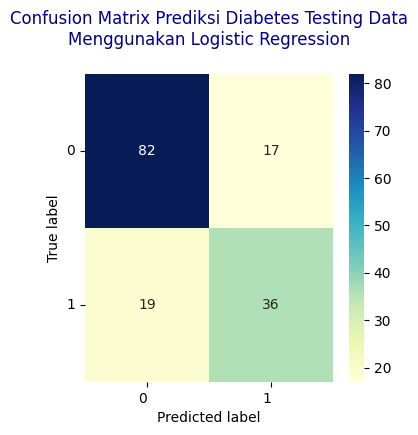

In [309]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Testing Data\nMenggunakan Logistic Regression\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

In [310]:
y_pred_train = log_model.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[354  47]
 [ 92 121]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.84       401
           1       0.72      0.57      0.64       213

    accuracy                           0.77       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614



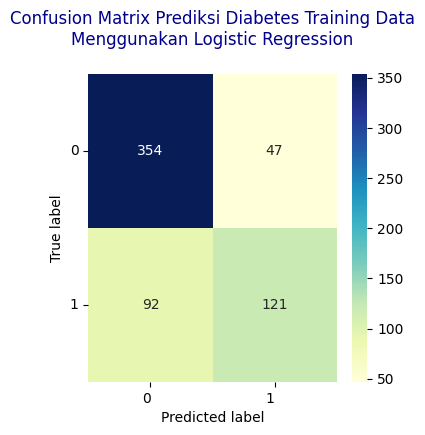

In [311]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_pred_train)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Training Data\nMenggunakan Logistic Regression\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

In [312]:
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

Accuracy on Test Data:0.7662
Accuracy on Train Data:0.7736


In [313]:
#append accuracies on new list
method_names.append("Logistic Regression")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))
train_accuracies_scores.append(accuracy_score(y_train,y_pred_train))

##### 2. KNearest Neighbor (KNN)

In [314]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=7)
knn_model = knn.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[72 27]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75        99
           1       0.56      0.64      0.60        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.70      0.69      0.70       154



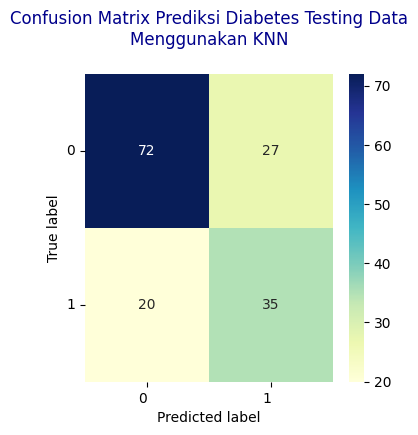

In [315]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_pred)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Testing Data\nMenggunakan KNN\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

In [316]:
y_pred_train = knn_model.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[356  45]
 [ 73 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.76      0.66      0.70       213

    accuracy                           0.81       614
   macro avg       0.79      0.77      0.78       614
weighted avg       0.80      0.81      0.80       614



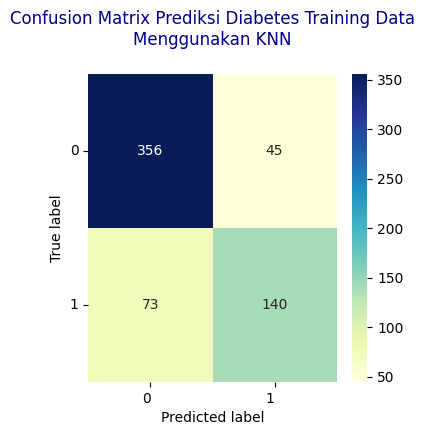

In [317]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_pred_train)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Training Data\nMenggunakan KNN\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

In [318]:
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

Accuracy on Test Data:0.6948
Accuracy on Train Data:0.8078


In [319]:
#append accuracies on new list
method_names.append("KNN")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))
train_accuracies_scores.append(accuracy_score(y_train,y_pred_train))

##### 3. Decision Tree

In [320]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dt_model = dectree.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

print("------------------------------------------------------------------")
print()
y_pred_train = dt_model.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[74 25]
 [16 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

------------------------------------------------------------------

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[401   0]
 [  0 213]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


Accuracy on Test Data:0.7338
Accuracy on Train Data:1.0000


In [324]:
#Hyperparameter Tuning on Decision Tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dt = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],
            'max_depth': np.arange(2,10),
            'min_samples_split':np.arange(2,40),
            'min_samples_leaf':np.arange(2,25)}

rscv_dt = RandomizedSearchCV(dt,param_grid,cv=5)
rscv_dt.fit(x_train,y_train)
rscv_dt.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=18, min_samples_split=18)

In [325]:
new_dt = rscv_dt.best_estimator_

In [326]:
#decision tree model with hyperparameter tuning
y_pred = new_dt.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

print("------------------------------------------------------------------")
print()
y_pred_train = new_dt.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[78 21]
 [16 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154

------------------------------------------------------------------

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[357  44]
 [ 55 158]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       401
           1       0.78      0.74      0.76       213

    accuracy                           0.84       614
   macro avg       0.82      0.82      0.82       614
weighted avg       0.84      0.84      0.84       614


Accuracy on Test Data:0.7597
Accuracy on Train Data:0.8388


In [327]:
#append accuracies on new list
method_names.append("Decision Tree")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))
train_accuracies_scores.append(accuracy_score(y_train,y_pred_train))

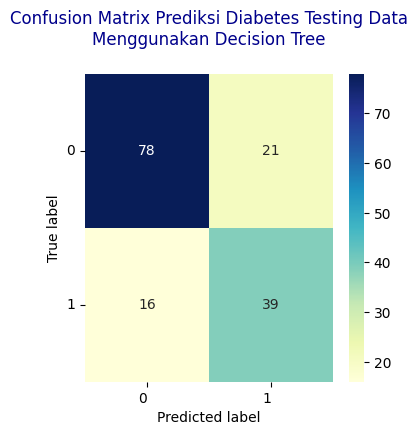

In [328]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_pred)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Testing Data\nMenggunakan Decision Tree\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

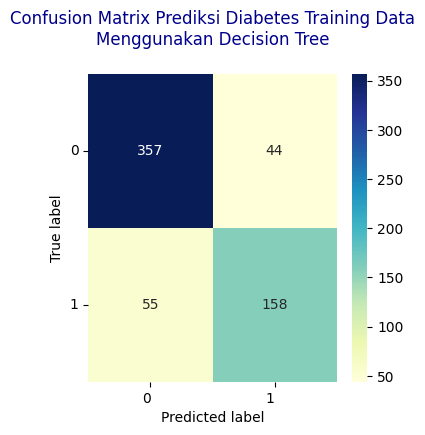

In [329]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_pred_train)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Training Data\nMenggunakan Decision Tree\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

##### 4. Random Forest

In [330]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
rf_model = random_forest.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

print("------------------------------------------------------------------")
print()
y_pred_train = rf_model.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

------------------------------------------------------------------

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[401   0]
 [  0 213]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


Accuracy on Test Data:0.7468
Accuracy on Train Data:1.0000


In [369]:
#Hyperparameter Tuning on Random Forest
rf = RandomForestClassifier()
param_grid={'n_estimators':np.arange(50,200),
            'criterion':['gini','entropy'],
            'max_depth':np.arange(3,9),
            'min_samples_split':np.arange(2,40),
            'min_samples_leaf':np.arange(2,20),
            'oob_score':[True]}

rscv_rf = RandomizedSearchCV(rf,param_grid,cv=5)
rscv_rf.fit(x_train,y_train)
rscv_rf.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=13, min_samples_split=17,
                       n_estimators=62, oob_score=True)

In [370]:
new_rf = rscv_rf.best_estimator_

In [371]:
y_pred = new_rf.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

print("------------------------------------------------------------------")
print()
y_pred_train = new_rf.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[88 11]
 [22 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

------------------------------------------------------------------

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[368  33]
 [ 90 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       401
           1       0.79      0.58      0.67       213

    accuracy                           0.80       614
   macro avg       0.80      0.75      0.76       614
weighted avg       0.80      0.80      0.79       614


Accuracy on Test Data:0.7857
Accuracy on Train Data:0.7997


In [372]:
#append accuracies on new list
method_names.append("Random Forest")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))
train_accuracies_scores.append(accuracy_score(y_train,y_pred_train))

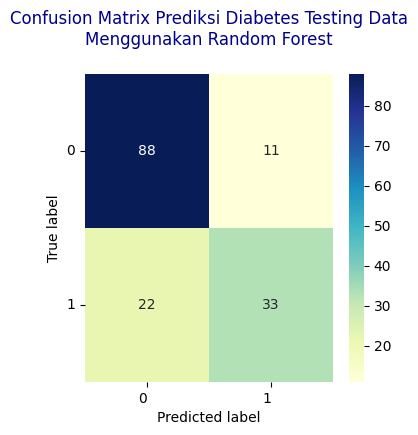

In [373]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_pred)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Testing Data\nMenggunakan Random Forest\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

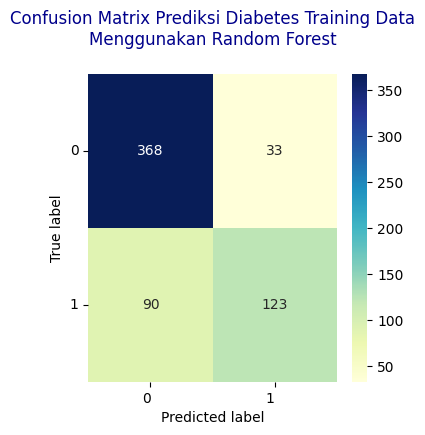

In [374]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_pred_train)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Training Data\nMenggunakan Random Forest\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

##### 5. Support Vector Machine (SVM)

In [377]:
from sklearn.svm import SVC
svc = SVC(random_state = 1)
svm_model = svc.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[88 11]
 [23 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [378]:
y_pred_train = svm_model.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[367  34]
 [109 104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       401
           1       0.75      0.49      0.59       213

    accuracy                           0.77       614
   macro avg       0.76      0.70      0.71       614
weighted avg       0.76      0.77      0.75       614



In [379]:
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

Accuracy on Test Data:0.7792
Accuracy on Train Data:0.7671


In [380]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [381]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [383]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 0.9, 'gamma': 0.1, 'kernel': 'linear'}

In [384]:
svc2 = SVC(C = 0.9, gamma =  0.1, kernel= 'linear')
svm_model2 = svc2.fit(x_train, y_train)
y_pred2 = svm_model2.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred2))
print()
print('Classification Report:\n',classification_report(y_test,y_pred2))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[82 17]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [385]:
y_pred_train2 = svm_model2.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train2))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train2))

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[353  48]
 [ 93 120]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



In [386]:
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred2):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train2):.4f}")

Accuracy on Test Data:0.7597
Accuracy on Train Data:0.7704


In [387]:
#append accuracies on new list
method_names.append("SVM")
test_accuracies_scores.append(accuracy_score(y_test,y_pred2))
train_accuracies_scores.append(accuracy_score(y_train,y_pred_train2))

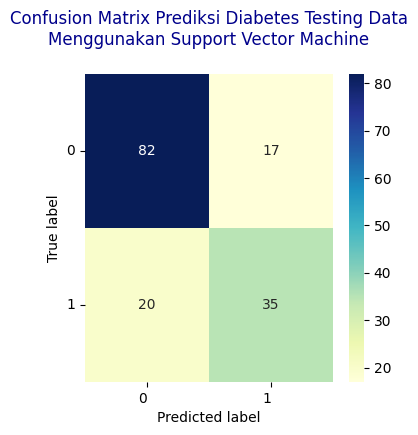

In [388]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_pred2)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Testing Data\nMenggunakan Support Vector Machine\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

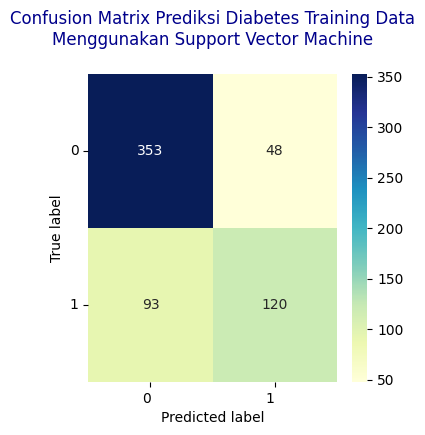

In [389]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_pred_train2)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Training Data\nMenggunakan Support Vector Machine\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

##### 6. AdaBoost

In [390]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab_model = ab.fit(x_train, y_train)
y_pred = ab_model.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

print("------------------------------------------------------------------")
print()
y_pred_train = ab_model.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[80 19]
 [22 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

------------------------------------------------------------------

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[354  47]
 [ 60 153]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       401
           1       0.77      0.72      0.74       213

    accuracy                           0.83       614
   macro avg       0.81      0.80      0.80       614
weighted avg       0.82      0.83      0.82       614


Accuracy on Test Data:0.7338
Accuracy on Train Data:0.8257


In [391]:
ab = AdaBoostClassifier()

param_grid={'n_estimators':np.arange(50,200),
    'learning_rate':np.arange(0,2,0.001)}

rscv_ab = RandomizedSearchCV(ab,param_grid,cv=5)
rscv_ab.fit(x_train,y_train)
rscv_ab.best_estimator_

AdaBoostClassifier(learning_rate=1.3840000000000001, n_estimators=57)

In [392]:
new_ab = rscv_ab.best_estimator_

In [393]:
y_pred = new_ab.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

print("------------------------------------------------------------------")
print()
y_pred_train = new_ab.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[77 22]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

------------------------------------------------------------------

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[368  33]
 [ 54 159]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       401
           1       0.83      0.75      0.79       213

    accuracy                           0.86       614
   macro avg       0.85      0.83      0.84       614
weighted avg       0.86      0.86      0.86       614


Accuracy on Test Data:0.7403
Accuracy on Train Data:0.8583


In [394]:
#append accuracies on new list
method_names.append("AdaBoost")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))
train_accuracies_scores.append(accuracy_score(y_train,y_pred_train))

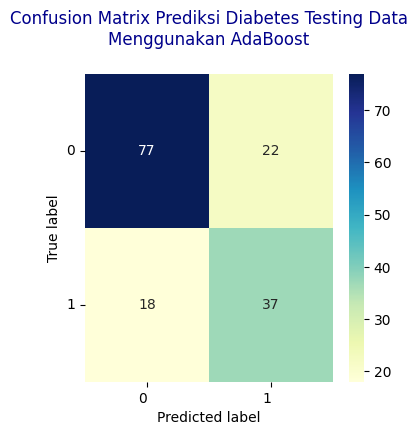

In [395]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_pred)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Testing Data\nMenggunakan AdaBoost\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

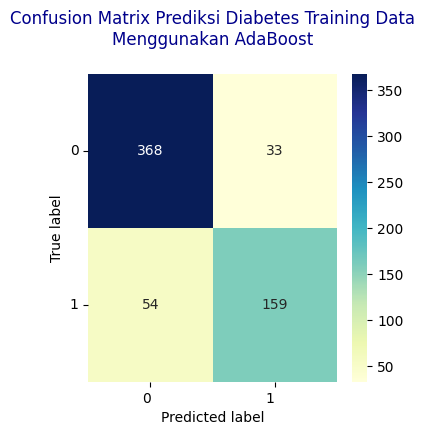

In [396]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_pred_train)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Training Data\nMenggunakan AdaBoost\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

##### 7. Gaussian Naive Bayes

In [397]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
nb_model = naive_bayes.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)
print("-----Test Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

-----Test Data Model Evaluation-----

Confusion Matrix:
 [[76 23]
 [16 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



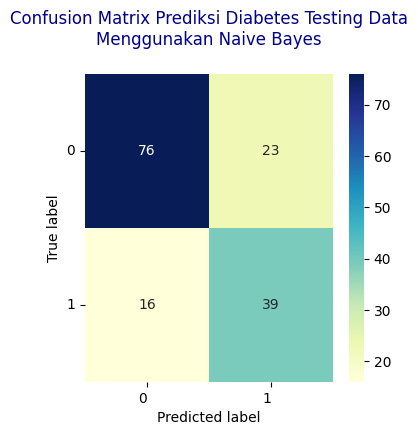

In [398]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_pred)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Testing Data\nMenggunakan Naive Bayes\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

In [399]:
y_pred_train = nb_model.predict(x_train)
print("-----Train Data Model Evaluation-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))

-----Train Data Model Evaluation-----

Confusion Matrix:
 [[330  71]
 [ 79 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       401
           1       0.65      0.63      0.64       213

    accuracy                           0.76       614
   macro avg       0.73      0.73      0.73       614
weighted avg       0.75      0.76      0.75       614



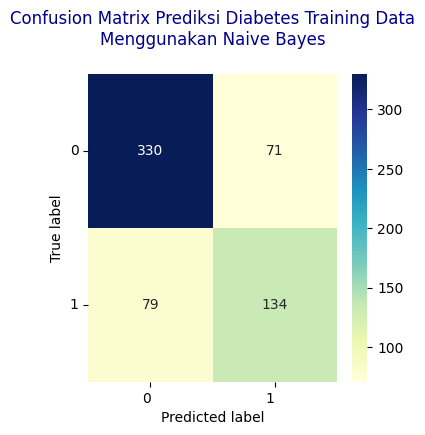

In [400]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_pred_train)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.title('Confusion Matrix Prediksi Diabetes Training Data\nMenggunakan Naive Bayes\n', fontsize=12, color='darkblue')
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

In [401]:
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

Accuracy on Test Data:0.7468
Accuracy on Train Data:0.7557


In [403]:
#append accuracies on new list
method_names.append("Naive Bayes")
test_accuracies_scores.append(accuracy_score(y_test,y_pred))
train_accuracies_scores.append(accuracy_score(y_train,y_pred_train))

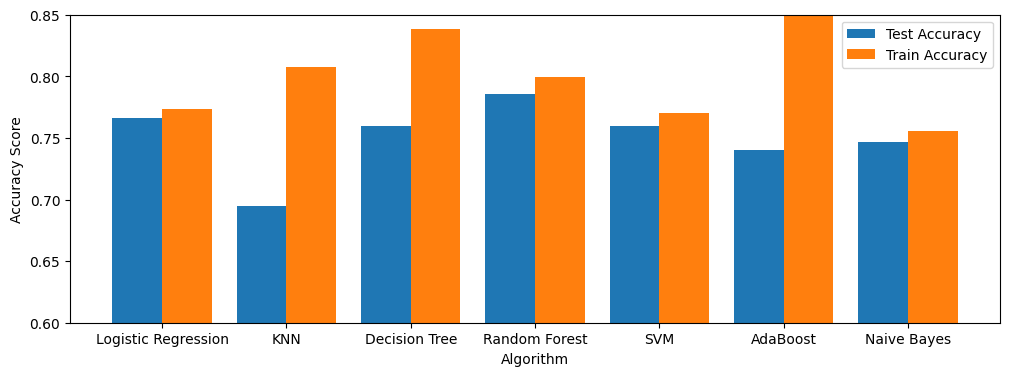

In [404]:
#Compare Algorithm
plt.figure(figsize=(12,4))
plt.ylim([0.6,0.85])
x_axis = np.arange(len(method_names))
plt.bar(x_axis - 0.2, test_accuracies_scores, 0.4, label = 'Test Accuracy') 
plt.bar(x_axis + 0.2, train_accuracies_scores, 0.4, label = 'Train Accuracy') 
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.xticks(x_axis,method_names)
plt.legend()
plt.show()

##### Predictions with Random Forest

In [406]:
# Random Forest Model
y_pred_rf = new_rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred_rf))

Accuracy: 0.7857142857142857


In [407]:
y_pred_rf[:10]   # Predicted Class Labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [408]:
y_test[:10]  # actual Class Labels

668    0
324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
Name: Outcome, dtype: int64

In [409]:
input_data = [2,109,72,20,30,40.6,0.456,28]
predictions = new_rf.predict([input_data])[0]
if predictions ==1:
    print("Terkena Diabetes")
else:
    print("Tidak Terkena Diabetes")

Tidak Terkena Diabetes
